<a href="https://colab.research.google.com/github/EnergyTIC/Solar-energy-prouction-2022/blob/main/Energy_report_version%20finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forcasting solar energy production using LR SVR RF XGBOOST ANN

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('energyproduction.xlsx')

In [3]:
y = data['ENERGY DAY (KWH)']

X = data[['IRRADIATION (kWh/m2 per day)','TEMP (C°)']]


In [4]:
date=data['DATE']

In [5]:
print('la taille de X est ',X.shape)
print('la taille de y est ',y.shape)

la taille de X est  (365, 2)
la taille de y est  (365,)


In [8]:
new_data = data[['IRRADIATION (kWh/m2 per day)','TEMP (C°)','ENERGY DAY (KWH)']]

new_data.isna().sum()

IRRADIATION (kWh/m2 per day)    0
TEMP (C°)                       0
ENERGY DAY (KWH)                0
dtype: int64

In [9]:
new_data = data[['IRRADIATION (kWh/m2 per day)','TEMP (C°)','ENERGY DAY (KWH)']]

corr = new_data.corr()

corr.style.background_gradient(cmap='coolwarm')

,IRRADIATION (kWh/m2 per day),TEMP (C°),ENERGY DAY (KWH)
IRRADIATION (kWh/m2 per day),1.000000,0.070871,0.103284
TEMP (C°),0.070871,1.000000,0.673922
ENERGY DAY (KWH),0.103284,0.673922,1.000000


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # 30% pour test et 70 % pour l'entrainement


In [36]:
print('la taille de X est ',X_train.shape)

la taille de X est  (255, 2)


Implementation of Quantil regression neural network


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [13]:
# Define the QRNN model
def create_qrnn(input_dim, num_quantiles):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_quantiles))
    return model

In [14]:
# Specify the hyperparameters and training settings
input_dim = 10  # Number of input features
num_quantiles = 5  # Number of quantiles to estimate
learning_rate = 0.001
batch_size = 32
epochs = 100

In [16]:
# Define custom quantile loss function
def quantile_loss(y_true, y_pred, quantile):
    error = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(quantile * error, (quantile - 1) * error))
    return loss

# Specify the quantiles to be estimated
quantiles = [0.1, 0.5, 0.9]

# Compile the model with the custom loss function
model.compile(loss=lambda y_true, y_pred: quantile_loss(y_true, y_pred, quantiles), optimizer=tf.keras.optimizers.Adam(learning_rate))

In [20]:
import tensorflow as tf

# Define custom quantile loss function
def quantile_loss(y_true, y_pred, quantiles):
    loss = 0
    for i, quantile in enumerate(quantiles):
        error = y_true - y_pred[:, i]
        loss += tf.reduce_mean(tf.maximum(quantile * error, (quantile - 1) * error))
    return loss

# Specify the quantiles to be estimated
quantiles = [0.1, 0.5, 0.9]

# Compile the model with the custom loss function
model.compile(loss=lambda y_true, y_pred: quantile_loss(y_true, y_pred, quantiles), optimizer=tf.keras.optimizers.Adam(learning_rate))

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Define the quantile levels
quantiles = [0.25, 0.5, 0.75]

# Define the quantile loss function
def quantile_loss(y, y_pred):
    errors = y - y_pred
    loss = tf.reduce_mean(tf.maximum(quantiles * errors, (quantiles - 1) * errors), axis=-1)
    return loss

# Define the quantile regression neural network model
def quantile_regression_model(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(len(quantiles)))
    return model

# Convert DataFrame to NumPy array and reshape
X_train_reshaped = X_train.values.reshape(-1, 255, 2)

# Create an instance of the quantile regression model
model = quantile_regression_model(input_shape=(365, 2))

# Compile the model
model.compile(optimizer='adam', loss=quantile_loss)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)


ValueError: ignored

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train) # fit = entrainer le modele



In [ ]:
y_pred_lr = reg.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred_lr)

NameError: ignored

New metrix 


In [8]:
from sklearn.metrics import mean_squared_error

In [9]:

from sklearn.metrics import mean_absolute_error

In [10]:
from sklearn.metrics import r2_score


In [7]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_scaled_error(y, y_pred, y_train):
    e_t = y - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

RMSE for LR is: 178.15


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred_lr)

MAPE for LR is 0.099

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred_lr)

In [ ]:
y_pred_lr_total = reg.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_lr)

MAE for LR is: 10.179

R2 for LR is: 0.49

Text(0.5, 0.98, 'Energy production in 2022 (KWH)')

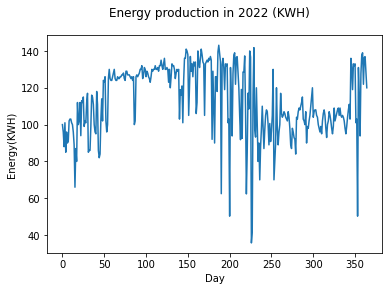

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Energy production in 2022 (KWH)')

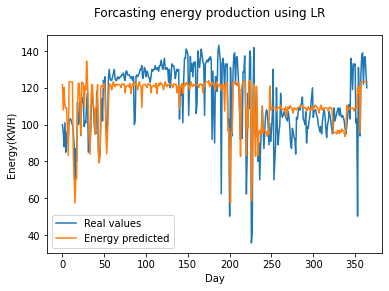

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_lr_total)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using LR')
plt.legend(['Real values', 'Energy predicted'])

In [ ]:
X_train.shape
y_train.shape

(255,)

In [ ]:
reg.coef_

array([ 1.52865779, 12.69213613])

Implementation de l'Algorithm SVM


# Energie = 1.528 * irradiation + 12.692 * température 

In [ ]:
from itertools import chain

def my_grid_result_df(grid_result):
    rmses = grid_result.cv_results_['mean_test_RMSE']
    maes = grid_result.cv_results_['mean_test_MAE']
    times=grid_result.cv_results_['mean_score_time']
    params = grid_result.cv_results_['params']
    zipSorted=sorted(zip(rmses,maes,times, params),key = lambda t: t[0],reverse=True)
    my_dict=params
    my_data=[]
    for rmse, mae,time, param in zipSorted:
        score={"RMSE":rmse,"MAE":mae,"time":time} 
        my_data_tmp =  dict(chain.from_iterable(d.items() for d in (score, param)))
        my_data.append(my_data_tmp)
    return pd.DataFrame(data=my_data)

In [38]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR

reg = SVR()
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 

scoring = {'RMSE':'neg_mean_squared_error','MAE':'neg_mean_absolute_error'}


parameters = {'kernel':('linear', 'rbf','sigmoid','poly'),'degree':[3,4,5] ,'C':[1,2,3,4,5, 10],'gamma':('scale','auto')}

search = GridSearchCV(reg, parameters, scoring=scoring, n_jobs=1, cv=5, refit="RMSE")
grid_result = search.fit(X, y)


KeyboardInterrupt: ignored

In [ ]:
my_grid_result_df(grid_result)

,RMSE,MAE,time,C,degree,gamma,kernel
0,-2.011008e+02,-9.718744,0.002868,10,3,auto,rbf
1,-2.011008e+02,-9.718744,0.002985,10,4,auto,rbf
2,-2.011008e+02,-9.718744,0.005083,10,5,auto,rbf
3,-2.018359e+02,-10.463655,0.002733,3,4,scale,poly
4,-2.024428e+02,-10.434099,0.003323,1,5,scale,poly
...,...,...,...,...,...,...,...
139,-3.283268e+10,-135717.488790,0.003154,2,5,auto,poly
140,-6.732176e+10,-190710.064917,0.003514,3,5,auto,poly
141,-2.498079e+11,-406227.336875,0.003368,4,5,auto,poly
142,-2.614083e+11,-398266.465586,0.003003,5,5,auto,poly


In [39]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(kernel='rbf',C=10, epsilon=0.2,degree=3, gamma='auto'))
reg2=regr.fit(X_train, y_train)


Prediction with SVR

In [48]:
y_pred_svr = reg2.predict(X_test)

In [49]:
mean_squared_error(y_test,y_pred_svr)

179.09466731490895

In [50]:
r2_score(y_test,y_pred_svr)

0.49613040736165226

In [51]:
mean_absolute_error(y_test,y_pred_svr)

8.82490216443711

In [52]:
mean_absolute_scaled_error(y_test, y_pred_svr, y_train)

0.4267978335263458

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_svr)

0.0914216852127349

In [ ]:
from sklearn import svm
regr_svm = svm.SVR()
reg2_svm=regr_svm.fit(X_train, y_train)
SVR()


SVR()

In [ ]:
y_pred_svm = reg2_svm.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_svm)

290.89058897608976

In [ ]:
y_pred_svr_total = reg2.predict(X)

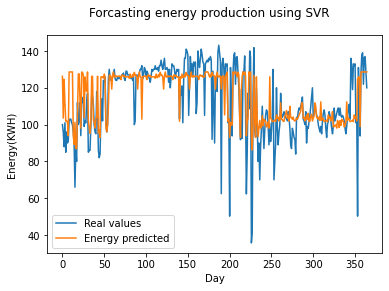

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_svr_total)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using SVR')
plt.legend(['Real values', 'Energy predicted'])

In [53]:
#train artificial neural network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes':(100,),
               'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': np.logspace(-5, 0, 10),
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'validation_fraction':[0.1],
              'max_iter': [1000]}
ann = MLPRegressor()
grid_search = GridSearchCV(ann, parameters, cv=5, verbose=0)
ann_cv = grid_search.fit(X_train, y_train)
#test artificial neural network
print("Tuned hpyerparameters (best parameters):", ann_cv.best_params_)
print("Train accuracy:", ann_cv.best_score_)
print("Test accuracy:", ann_cv.best_estimator_.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-pac

KeyboardInterrupt: ignored

In [60]:
#train artificial neural network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes':[1000],
               'activation': ['identity'],
              'solver': ['lbfgs'],
              'alpha': [1e-05],
              'learning_rate':['adaptive'],
              'validation_fraction':[0.1],
              'max_iter': [1000]}
ann = MLPRegressor()
grid_search = GridSearchCV(ann, parameters, cv=5, verbose=0)
ann_cv = grid_search.fit(X_train, y_train)
#test artificial neural network
print("Tuned hpyerparameters (best parameters):", ann_cv.best_params_)
print("Train accuracy:", ann_cv.best_score_)
print("Test accuracy:", ann_cv.best_estimator_.score(X_test, y_test))

Tuned hpyerparameters (best parameters): {'activation': 'identity', 'alpha': 1e-05, 'hidden_layer_sizes': 1000, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs', 'validation_fraction': 0.1}
Train accuracy: 0.38659007422476127
Test accuracy: 0.49878117112306997


In [62]:
y_pred_ann = ann_cv.predict(X_test)

In [63]:
mean_squared_error(y_test,y_pred_ann)

178.15248374019527

In [64]:
r2_score(y_test,y_pred_ann)

0.49878117112306997

In [69]:
mean_absolute_scaled_error(y_test, y_pred_ann, y_train)

0.4922903443127637

In [70]:
mean_absolute_percentage_error(y_test,y_pred_ann)

NameError: ignored

In [65]:
mean_absolute_error(y_test,y_pred_ann)

10.179091325656936

In [ ]:
y_pred_ann_total = ann_cv.predict(X)

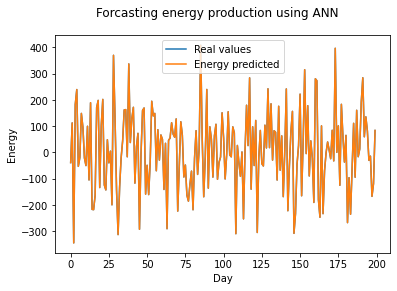

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_ann_total)
plt.ylabel('Energy')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using ANN')
plt.legend(['Real values', 'Energy predicted'])

Random Forest

In [72]:
#train random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_depth': [70],
              'max_features': ['auto'],
              'min_samples_leaf': [4],
              'min_samples_split': [10],
              'n_estimators': [400]}
              
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, parameters, cv=5, verbose=0)
forest_cv = grid_search.fit(X_train, y_train)
y_pred_rf = forest_cv.predict(X_test)
print("RMSE:", mean_squared_error(y_test,y_pred_rf))
print("MAE:", mean_absolute_error(y_test,y_pred_rf))
print("R2:", r2_score(y_test,y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RMSE: 168.52833752022204
MAE: 9.285083953305374
R2: 0.525857994280641


In [73]:
y_pred_rf_total = forest_cv.predict(X)

In [74]:
mean_absolute_scaled_error(y_test, y_pred_rf, y_train)

0.44905355793638285

NameError: ignored

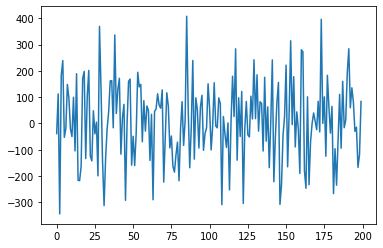

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_rf_total)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using RF')
plt.legend(['Real values', 'Energy predicted'])

# XGBOOST


In [76]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.05,0,1,0.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [1,4,10,100],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,400,500,800]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[15:05:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.05, 0, 1, 0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7],
                         'min_child_weight': [1, 4, 10, 100],
                         'n_estimators': [100, 400, 500, 800], 'nthread': [4],
                         'objective': ['reg:linear'], 'subsample': [0.7]},
             verbose=True)

In [82]:
xgboost_cv = xgb_grid.fit(X_train,y_train)
y_pred_xgboost = xgboost_cv.predict(X_test)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[15:15:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred_xgboost_total = xgboost_cv.predict(X)
                                    

In [84]:
print("RMSE:", mean_squared_error(y_test,y_pred_xgboost))
print("MAE:", mean_absolute_error(y_test,y_pred_xgboost))
print("MASE:", mean_absolute_scaled_error(y_test, y_pred_xgboost, y_train))
print("R2:", r2_score(y_test,y_pred_xgboost))
y_pred_xgboost_total = xgboost_cv.predict(X)

RMSE: 167.2562510103582
MAE: 9.273811151677911
MASE: 0.448508372593506
R2: 0.5294369155357267


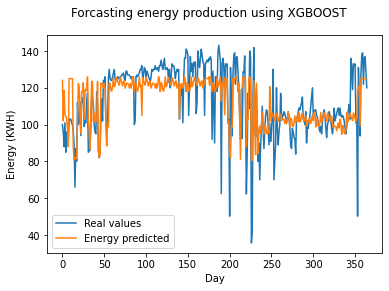

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_xgboost_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using XGBOOST')
plt.legend(['Real values', 'Energy predicted'])

Decision tree

In [ ]:
#train decision tree
from sklearn.tree import DecisionTreeRegressor
parameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, parameters, cv=5, verbose=0)
tree_cv = grid_search.fit(X_train, y_train)


Tuned hpyerparameters (best parameters): {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Train accuracy: 0.46653524042268923
Test accuracy: 0.4789550556920431


In [77]:
#train decision tree
from sklearn.tree import DecisionTreeRegressor
parameters = {'criterion': ['friedman_mse'],
              'splitter': ['random'],
              'max_depth': [10],
              'max_features': ['log2'],
              'min_samples_leaf': [1],
              'min_samples_split': [5]}
tree = DecisionTreeRegressor()
grid_search = GridSearchCV(tree, parameters, cv=5, verbose=0)
tree_cv = grid_search.fit(X_train, y_train)

In [78]:
tree_cv = grid_search.fit(X_train, y_train)
y_pred_dt = tree_cv.predict(X_test)
y_pred_dt_total = tree_cv.predict(X)
print("RMSE:", mean_squared_error(y_test,y_pred_dt))
print("MAE:", mean_absolute_error(y_test,y_pred_dt))
print("R2:", r2_score(y_test,y_pred_dt))
print("MASE:", mean_absolute_scaled_error(y_test, y_pred_dt, y_train))
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_dt_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using DT')
plt.legend(['Real values', 'Energy predicted'])

In [80]:
print("RMSE:", mean_squared_error(y_test,y_pred_dt))
print("MAE:", mean_absolute_error(y_test,y_pred_dt))
print("R2:", r2_score(y_test,y_pred_dt))
print("MASE:", mean_absolute_scaled_error(y_test, y_pred_dt, y_train))


RMSE: 173.04606356788418
MAE: 9.888767184835366
R2: 0.5131477063786312


In [81]:
mean_absolute_scaled_error(y_test, y_pred_dt, y_train)

0.4782494278227906

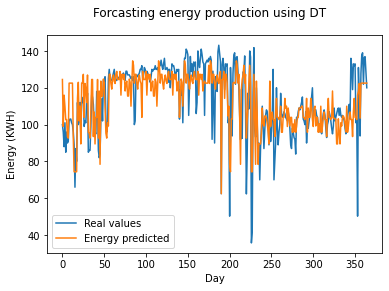

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_dt_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using DT')
plt.legend(['Real values', 'Energy predicted'])

In [102]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the quantile levels
quantiles = [0.10, 0.50, 0.90]  # Adjust the quantile levels as needed

# Define the quantile loss function
def quantile_loss(y_test, y_pred):
    errors = y_test - y_pred
    loss = tf.reduce_mean(tf.maximum(quantiles * errors, (quantiles - 1) * errors), axis=-1)
    return loss

# Define the quantile regression neural network model
def quantile_regression_model(input_shape, num_quantiles):
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_quantiles))
    return model

# Create an instance of the quantile regression model
model = quantile_regression_model(input_shape=(365,2), num_quantiles=len(quantiles))  # Adjust the input shape and number of quantiles as needed

# Compile the model
model.compile(optimizer='adam', loss=quantile_loss)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust the training data and parameters as needed


TypeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the quantile levels
quantiles = [0.10, 0.50, 0.90]  # Adjust the quantile levels as needed

# Define the quantile loss function
def quantile_loss(y_true, y_pred):
    errors = y_true - y_pred
    loss = tf.reduce_mean(tf.maximum(quantiles * errors, (quantiles - 1) * errors), axis=-1)
    return loss

# Define the quantile regression neural network model
def quantile_regression_model(input_shape, num_quantiles):
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_quantiles))
    return model

# Create an instance of the quantile regression model
input_shape = (num_features,)  # Adjust the input shape as needed
model = quantile_regression_model(input_shape=input_shape, num_quantiles=len(quantiles)) 

# Compile the model
model.compile(optimizer='adam', loss=quantile_loss)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust the training data and parameters as needed


In [104]:
import numpy as np
from keras import backend as K
from keras.layers import Input, Dense, GaussianNoise, Dropout
from keras.models import Model
from keras import regularizers
from tensorflow import keras
import tensorflow as tf

def qloss(y_true, y_pred, n_q=99):
    q = np.array(range(1, n_q + 1))
    left = (q / (n_q + 1) - 1) * (y_true - y_pred)
    right = q / (n_q + 1) * (y_true - y_pred)
    return K.mean(K.maximum(left, right))

def get_model(input_dim, num_units, act, dp=0.1, gauss_std=0.3, num_hidden_layers=1, num_quantiles=99):
    input = Input((input_dim,), name='input')
    
    x = input
    
    for i in range(num_hidden_layers):
        x = Dense(num_units[i], use_bias=True, kernel_initializer='he_normal', bias_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.001), activation=act[i])(x)
        x = Dropout(dp[i])(x)
        x = GaussianNoise(gauss_std[i])(x)  #似乎不适用与小模型?
    
    x = Dense(num_quantiles, activation=None, use_bias=True, kernel_initializer='he_normal', bias_initializer='he_normal')(x)

    model = Model(input, x)
    return model

In [110]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [112]:
# Parameters
input_dim = 3
num_hidden_layers = 2
num_units = [200, 200]
act = ['relu', 'relu']
dropout = [0.1, 0.1]
gauss_std = [0.3, 0.3]
num_quantiles = 9

# Get model
model = get_model(input_dim, num_units, act, dropout, gauss_std, num_hidden_layers, num_quantiles)
print(model.summary())

# Train
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss=lambda y_t, y_p: qloss(y_true=y_t, y_pred=y_p, n_q=num_quantiles), 
              optimizer='adam')
model.fit(x=X_train, y=y_train, 
          epochs=10, 
          validation_split=0.2, 
          batch_size=64, 
          shuffle=True, 
          callbacks=[early_stopping]
         )

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 dense_40 (Dense)            (None, 200)               800       
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 gaussian_noise_10 (Gaussian  (None, 200)              0         
 Noise)                                                          
                                                                 
 dense_41 (Dense)            (None, 200)               40200     
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                           

ValueError: ignored

In [129]:
# Parameters
input_dim = 2
num_hidden_layers = 2
num_units = [200, 200]
act = ['relu', 'relu']
dropout = [0.1, 0.1]
gauss_std = [0.3, 0.3]
num_quantiles = 9

# Get model
model = get_model(input_dim, num_units, act, dropout, gauss_std, num_hidden_layers, num_quantiles)
print(model.summary())

# Train
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss=lambda y_t, y_p: qloss(y_true=y_t, y_pred=y_p, n_q=num_quantiles), 
              optimizer='adam')
qann=model.fit(X_train,y_train, 
          epochs=10, 
          validation_split=0.2, 
          batch_size=64, 
          shuffle=True, 
          callbacks=[early_stopping]
         )


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 dense_79 (Dense)            (None, 200)               600       
                                                                 
 dropout_36 (Dropout)        (None, 200)               0         
                                                                 
 gaussian_noise_36 (Gaussian  (None, 200)              0         
 Noise)                                                          
                                                                 
 dense_80 (Dense)            (None, 200)               40200     
                                                                 
 dropout_37 (Dropout)        (None, 200)               0         
                                                          

In [131]:
predictions = model.predict(X_test)
predictions_total=model.predict(X)

12/12 [==============================] - 0s 1ms/step


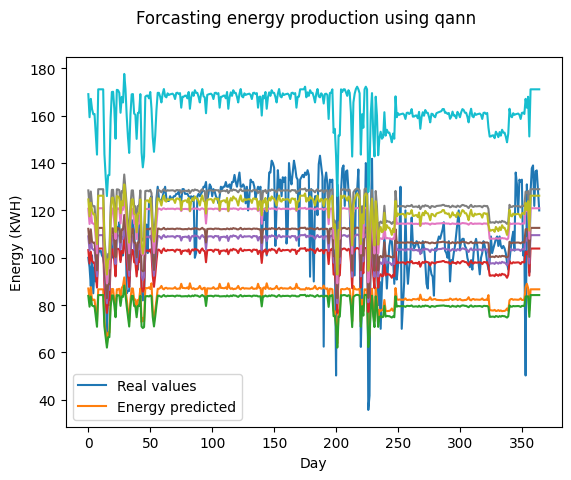

In [142]:
y_pred_qann = predictions
y_pred_qann_total = predictions_total

import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_qann_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using qann')
plt.legend(['Real values', 'Energy predicted'])

In [143]:
from keras import losses

model.compile(loss=losses.mean_squared_error, optimizer='sgd')
mean_squared_error(y, y_pred_qann)

InvalidArgumentError: ignored

In [16]:
pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


[114.29480064 112.12765279 109.26759588 123.52588034 111.677295
 107.01214403 109.13442087 111.677295   107.01214403 112.12765279
 107.01214403 115.39216338 111.64683785 113.52187705 113.8002087
 109.11246118 113.86627382 109.03506007 110.87406846 115.39216338
 120.81478172 111.58777451 111.58777451 113.65363221 109.9723611
 111.77800006 114.29480064 114.62502106 115.39216338 120.81478172
 111.64683785 109.26759588 113.76184108 113.76184108 111.58777451
 109.11246118 109.11246118 114.62502106 109.11246118 109.11246118
 111.64683785 114.22994925 123.52588034 112.39217625 112.1868861
 112.53307074 107.01214403 111.64683785 113.65363221 109.13442087
 112.1868861  113.65363221 111.207456   109.13442087 109.11246118
 109.03506007 109.9723611  120.81478172 120.81478172 109.26759588
 114.62502106 112.74978511 112.1868861  109.26759588 112.53307074
 113.76184108 135.24421826 109.9723611  112.53307074 113.40029774
 109.11246118 112.74978511 109.26759588 111.64683785 123.52588034
 112.1868861  1

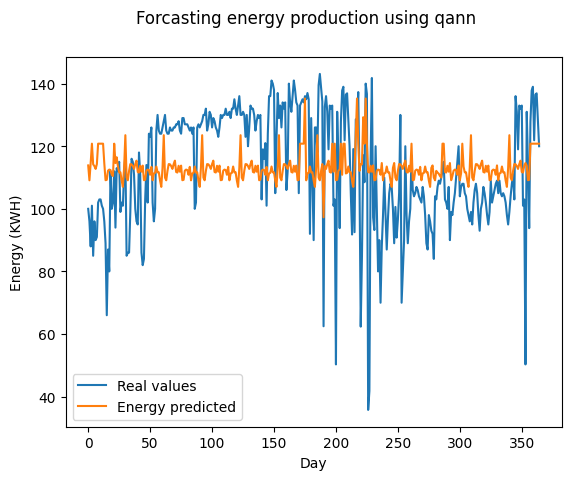

In [17]:
import numpy as np
from pygam import LinearGAM, s



# Create a Generalized Additive Model
gam = LinearGAM(s(0))  # Use a single spline term for the input feature

# Fit the GAM model to the data
gam.fit(X_train, y_train)

# Make predictions using the fitted model

predictions = gam.predict(X_test)
predictions_total = gam.predict(X)
y_pred_qann = predictions
y_pred_qann_total = predictions_total

import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_qann_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using qann')
plt.legend(['Real values', 'Energy predicted'])

# Print the predictions
print(predictions)


Best Parameters: {'max_iter': 50}
Best Score: -247.8770907212235


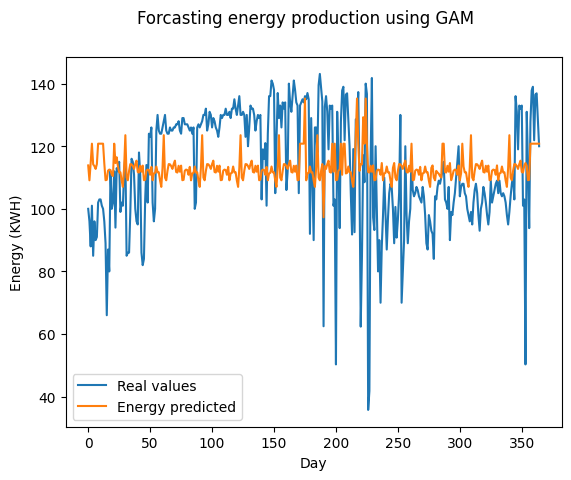

In [41]:
from sklearn.base import BaseEstimator, RegressorMixin
from pygam import LinearGAM

class ClonableLinearGAM(BaseEstimator, RegressorMixin):
    def __init__(self, callbacks=['deviance', 'diffs'], fit_intercept=True,
                 max_iter=100, scale=None, terms='auto', tol=0.0001, verbose=False):
        self.callbacks = callbacks
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.scale = scale
        self.terms = terms
        self.tol = tol
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = LinearGAM(callbacks=self.callbacks, fit_intercept=self.fit_intercept,
                               max_iter=self.max_iter, scale=self.scale, terms=self.terms,
                               tol=self.tol, verbose=self.verbose)
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Define the parameter grid for grid search
param_grid = {
    'max_iter': [50, 100, 150]  # Maximum number of iterations for optimization
}

# Create the GAM model
gam_model = ClonableLinearGAM()

# Create the grid search object
grid_search = GridSearchCV(gam_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
predictions = gam.predict(X_test)
predictions_total = gam.predict(X)
y_pred_gam = predictions
y_pred_gam_total = predictions_total

import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_qann_total)
plt.suptitle('Forcasting energy production using GAM')
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.legend(['Real values', 'Energy predicted'])


# Print the predictions

In [36]:
print("RMSE:", mean_squared_error(y_test,y_pred_gam))
print("MAE:", mean_absolute_error(y_test,y_pred_gam))
print("R2:", r2_score(y_test,y_pred_gam))
print("MASE:", mean_absolute_scaled_error(y_test, y_pred_gam, y_train))

RMSE: 368.3736427815908
MAE: 16.226086416834736
R2: -0.0363919825747534
MASE: 0.7847405444588353


In [135]:
from tensorflow.keras.losses import mean_squared_error
print("RMSE:", mean_squared_error(predictions))
print("MAE:", mean_absolute_error(predictions))
print("R2:", r2_score(predictions))
print("MASE:", mean_absolute_scaled_error(y_test,predictions, y_train))

TypeError: ignored

In [154]:
from sklearn.metrics import mean_squared_error

# ...

predictions = gam.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
mae=mean_absolute_error(y_test, predictions)
r2=r2_score(y_test, predictions)
mase=mean_absolute_scaled_error(y_test,predictions, y_train)

# Print the RMSE
print("RMSE:", rmse)
print("MAE:", mae)
print("r2:", r2)
print("mase:", mase)



RMSE: 19.193062360696658
MAE: 16.226086416834736
r2: -0.0363919825747534
mase: 0.7847405444588353


SARIMA MODEL

In [ ]:
y_pred_qann = qann.predict(X_test)
y_pred_qann_total = qann.predict(X)
print("RMSE:", mean_squared_error(y_pred_qann))
print("MAE:", mean_absolute_error(y_pred_qann))
print("R2:", r2_score(y_pred_qann))
print("MASE:", mean_absolute_scaled_error(y_test,y_pred_qann, y_train))
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(y_pred_qann_total)
plt.ylabel('Energy (KWH)')
plt.xlabel('Day')
plt.suptitle('Forcasting energy production using qann')
plt.legend(['Real values', 'Energy predicted'])

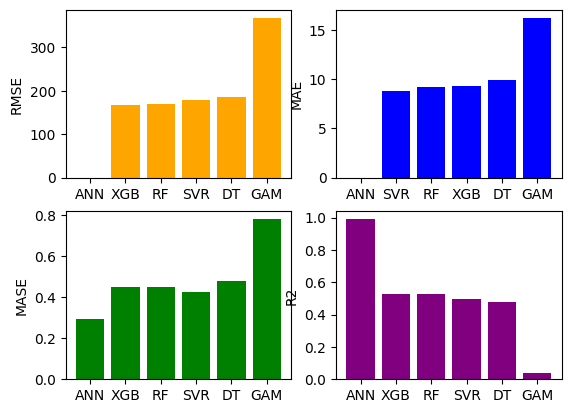

In [38]:
import pandas as pd
from matplotlib import pyplot as plt


df = pd.DataFrame(
   dict(
       x=[ 'SVR','ANN','DT','RF','XGB','GAM'],
      rmse=[ 179.094, 2.6e-08, 185.199, 168.87, 167.26,368.37],
      mae =[8.825, 0.00013, 9.93, 9.17, 9.27,16.22],
      r2=[0.496, 0.99,0.479,0.525, 0.529,0.036],
      mase=[ 0.427, 0.292,0.478,0.449, 0.448,0.78],
   )
)

plt.subplot(221)
df_sort= df.sort_values('rmse',ascending=True)
plt.bar('x', 'rmse', data=df_sort, color='orange')
plt.ylabel("RMSE")


plt.subplot(222)
df_sorted = df.sort_values('mae',ascending=True)
plt.bar('x', 'mae', data=df_sorted, color='blue')
plt.ylabel("MAE")

plt.subplot(223)
df_sorted = df.sort_values('r2',ascending=False)
plt.bar('x', 'mase', data=df_sorted, color='green')
plt.ylabel("MASE")

plt.subplot(224)
df_sorted = df.sort_values('r2',ascending=False)
plt.bar('x', 'r2', data=df_sorted, color='purple')
plt.ylabel("R2")


plt.show()